In [1192]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 100)


In [1193]:
df = pd.read_csv("failure.csv")
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [1194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [1195]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [1196]:
df["device"].value_counts().unique().sum()
# 18832 farklı cihaz var

18832

In [1197]:
#sns.barplot(x=df["device"] , y=df["failure"])

In [1198]:
df.groupby("device")["attribute1"]

In [1199]:
from pycaret.classification import *

In [1200]:
#exp_name = setup(data = df , target = "failure")

In [1201]:
#best_model = compare_models()

Gördüğümüz üzere accuracy skorumuz güzel gözükürken f1 skorumuzun 0 olması aslında modelimizin ezberlediğini gösterir.

In [1202]:
df["failure"].value_counts()

#0 ağırlıkta olan bir durumumuz var

0    124388
1       106
Name: failure, dtype: int64

<AxesSubplot:>

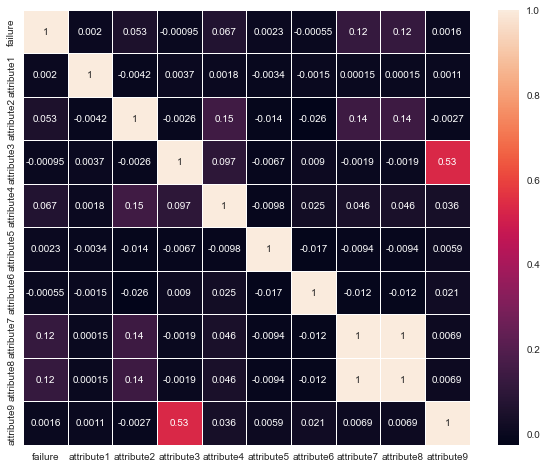

In [1203]:
#Öncelikle sütunlar arası korelasyona bakalım
fig , ax = plt.subplots(figsize = (10,8))
corr = df.corr()
sns.heatmap(corr , annot = True , linewidths = 0.6)

att3 ile att9 'un korelasyonu 0.52

att7 ile att 8'in korealsayonu 1 

In [1204]:
df[["attribute7" , "attribute8"]].sample(100)

# veri kendini tekrar ediyor o yüzden bir tanesini alsak yeter

,attribute7,attribute8
35426,0,0
17450,0,0
37962,0,0
123660,0,0
109289,0,0
24645,0,0
78308,0,0
13419,0,0
91966,0,0
106655,0,0


In [1205]:
del df["attribute8"]

In [1206]:
df["date"].min(), df["date"].max() 

#verimiz 2015 yılında 11 ay içinde değişiyor

('2015-01-01', '2015-11-02')

In [1207]:
df["date"] = pd.to_datetime(df["date"])

df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [1208]:
df.sample(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
95967,2015-06-24,W1F17DKS,0,7683800,0,0,0,11,237107,0,0,6,24
120605,2015-09-24,Z1F0QL3N,0,103606024,0,0,0,10,330425,0,0,9,24
100183,2015-07-06,Z1F0KSLS,0,142989552,0,0,0,66,251568,0,0,7,6
11679,2015-01-13,S1F10HH5,0,179154976,0,0,0,9,414119,0,0,1,13
98754,2015-07-02,W1F1BFMS,0,130378912,0,61,0,15,78,0,0,7,2
45951,2015-03-03,S1F0R0PX,0,128205496,0,0,0,12,243739,0,0,3,3
58166,2015-03-21,S1F0S7DN,0,225918944,0,0,0,8,319620,0,3,3,21
26572,2015-02-03,S1F0RSDT,0,195576096,0,0,0,8,194458,0,3,2,3
5938,2015-01-06,S1F0QWPP,0,194569936,0,0,0,8,193307,0,0,1,6
102142,2015-07-12,W1F0HJWZ,0,69918792,0,0,0,63,248194,0,1,7,12


<AxesSubplot:xlabel='month'>

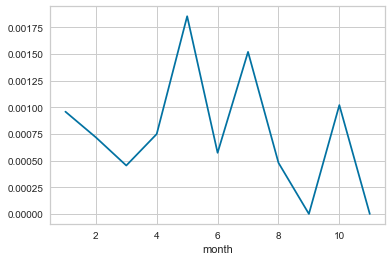

In [1209]:
df.groupby("month")["failure"].mean().plot()

#kazalar bazı aylarda artış göstermiş

<AxesSubplot:xlabel='day'>

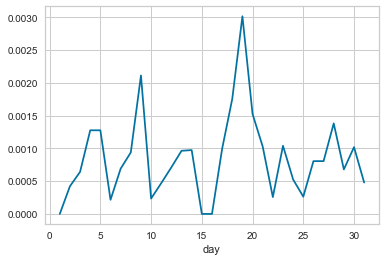

In [1210]:
df.groupby("day")["failure"].mean().plot()

#ilginç bir şekilde ayın 17 sinde kaza sayısı çok fazla olmuş

In [1211]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,12.451524,4.028299,14.894196
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,191.425623,2.572167,8.759542
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,2.000000,7.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,3.000000,15.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,6.000000,22.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,18701.000000,11.000000,31.000000


In [1212]:
df["device"].value_counts()

#1168 farklı kamyona ait 124000 adet veri var

S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [1213]:
# deviceda bulunan ilk 3 harf o aracın türünü gösteriyor

l = list()

for i in df["device"]:
    l.append(i[0:3])

df["device_type"] = l


In [1214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         124494 non-null  datetime64[ns]
 1   device       124494 non-null  object        
 2   failure      124494 non-null  int64         
 3   attribute1   124494 non-null  int64         
 4   attribute2   124494 non-null  int64         
 5   attribute3   124494 non-null  int64         
 6   attribute4   124494 non-null  int64         
 7   attribute5   124494 non-null  int64         
 8   attribute6   124494 non-null  int64         
 9   attribute7   124494 non-null  int64         
 10  attribute9   124494 non-null  int64         
 11  month        124494 non-null  int64         
 12  day          124494 non-null  int64         
 13  device_type  124494 non-null  object        
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 13.3+ MB


In [1215]:
x = df.copy()
del x["failure"]
del x["device"]
del x["date"]
y = df["failure"]

In [1216]:

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   attribute1   124494 non-null  int64 
 1   attribute2   124494 non-null  int64 
 2   attribute3   124494 non-null  int64 
 3   attribute4   124494 non-null  int64 
 4   attribute5   124494 non-null  int64 
 5   attribute6   124494 non-null  int64 
 6   attribute7   124494 non-null  int64 
 7   attribute9   124494 non-null  int64 
 8   month        124494 non-null  int64 
 9   day          124494 non-null  int64 
 10  device_type  124494 non-null  object
dtypes: int64(10), object(1)
memory usage: 10.4+ MB


In [1217]:
from imblearn import under_sampling

import collections

In [1218]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)
x_res  ,y_res = rus.fit_resample(x,y)
print(sorted(collections.Counter(y_res).items()) ,y_res.shape)

[(0, 106), (1, 106)] (212,)


In [1219]:
x_res = pd.get_dummies(x_res , drop_first = True)

In [1220]:
y_res.value_counts()

0    106
1    106
Name: failure, dtype: int64

In [1221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier() 

from sklearn.tree import DecisionTreeClassifier

d = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()

b = BernoulliNB()

from xgboost import XGBClassifier

xgbc = XGBClassifier()


In [1222]:
algorithms = [g,b,k,log,gbc,r,d,xgbc]
names = ['GaussianNB', 'BernoulliNB','K Nearest', 'Logistic', 'Gradient Boosting', 'RandomForest', 'Decision Tree',"XGBC"]



In [1223]:

def algo_test(x, y, algorithms = algorithms, names = names):
    
    #fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x, y)
    
    accuracy = []
    precision = [] 
    recall = []
    f1 = []

    for i in range(len(algorithms)):

        accuracy.append(accuracy_score(y, algorithms[i].predict(x))) 
        precision.append(precision_score (y, algorithms[i].predict(x))) 
        recall.append(recall_score (y, algorithms[i].predict(x)))
        f1.append(f1_score (y, algorithms[i].predict(x))) 
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall',"F1"], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1 
    
    return metrics.sort_values('F1', ascending = False)

In [1224]:
algo_test(x_res , y_res)

,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
XGBC,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.985849,1.000000,0.971698,0.985646
BernoulliNB,0.839623,0.875000,0.792453,0.831683
K Nearest,0.693396,0.672269,0.754717,0.711111
Logistic,0.688679,0.934783,0.405660,0.565789
GaussianNB,0.594340,0.857143,0.226415,0.358209


Verimiz under sampling ile modelde over fitting (modelin ezberlemesi) olmuş gibi duruyor 

O yüzden de over sampling denemeye karar verdim

Eğer burada model kullanacak olsaydım Bernolliyi tercih ederdim

# Over Sampling Method

In [1225]:
df_v2 = pd.DataFrame()

# her bir araç için sadece bir satır olan bir dataframe oluşturdum.

In [1226]:
#array = df["device"].unique()
#df_v2["device"] = df["device"].unique()
#c = ["device"]

#df_v2= pd.DataFrame(data = array , columns= c)


In [1227]:
df_v2["work"] = df.groupby("device")["date"].max() - df.groupby("device")["date"].min()

df_v2["work"] = df_v2["work"].dt.days

# araçların bozulana kadar veya hiç bozulmamışsa toplam çalıştığı gün sayısını elde ederiz

In [1228]:
df.sample(50)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day,device_type
35303,2015-02-15,S1F13HPP,0,128900688,0,0,0,10,219650,0,2,2,15,S1F
2621,2015-01-03,S1F0S5VX,0,116745736,0,0,0,8,190810,0,1,1,3,S1F
17979,2015-01-22,S1F0PEVC,0,34718280,0,0,0,6,242024,0,1,1,22,S1F
27152,2015-02-03,Z1F1A1HH,0,182393936,0,0,0,7,228054,0,0,2,3,Z1F
74629,2015-04-26,S1F0M2PQ,0,214478248,0,0,6,60,247335,0,0,4,26,S1F
50164,2015-03-09,S1F131F6,0,9727816,0,0,0,8,227300,0,0,3,9,S1F
102456,2015-07-13,S1F13619,0,87457264,0,0,0,9,216734,0,0,7,13,S1F
6088,2015-01-06,S1F0S70T,0,216322784,0,0,0,9,246770,0,0,1,6,S1F
40190,2015-02-22,W1F0SCL1,0,241295360,0,0,0,6,305202,0,0,2,22,W1F
121845,2015-10-03,S1F1162D,0,74806408,0,0,0,7,302824,0,0,10,3,S1F


In [1229]:
df_v2["attribute1"] = df.groupby("device")["attribute1"].mean()

In [1230]:
df_v2["attribute2"] = df.groupby("device")["attribute2"].max()

In [1231]:
df_v2["attribute3"] = df.groupby("device")["attribute3"].max()

# att 3 ile att 9 'un korelsyonu yüksek olduğu için sadece birini alırız

In [1232]:
df_v2["attribute4"] = df.groupby("device")["attribute4"].max()

In [1233]:
df_v2["attribute5"] = df.groupby("device")["attribute5"].max()

In [1234]:
df_v2["attribute6"] = df.groupby("device")["attribute6"].mean()

In [1235]:
df_v2["attribute7"] = df.groupby("device")["attribute7"].max()

In [1236]:
df_v2["month"] = df.groupby("device")["month"].max()

Gün almama sebebimiz ise günlerin kaza yapma oranıyla alakalı olamayacağıdır

Ay mevsimsel zamanı da gösterdiği için dpğru bir sorgulama olur.

In [1237]:
df_v2.head()

,work,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,month
device,,,,,,,,,
S1F01085,5,1.159330e+08,56,0,52,6,407878.500000,0,1
S1F013BB,5,1.198783e+08,0,0,0,5,689021.000000,0,5
S1F0166B,5,1.074958e+08,0,3,0,6,403549.166667,0,1
S1F01E6Y,47,1.331127e+08,0,0,0,12,254926.604167,0,2
S1F01JE0,5,1.673001e+08,0,0,0,6,410630.833333,0,1


In [1238]:
df_v2['device'] = df_v2.index


In [1239]:
l = list()

for i in df_v2["device"]:
    l.append(i[0:3])

df_v2["Type"] = l

In [1240]:
df_v2["failure"] = df.groupby("device")["failure"].max()

#max alma sebebimiz 106 adet olan failure  durumlarını alabilmektir.

In [1241]:

df_v2.head()
df_v2.reset_index(drop = True , inplace=True)

In [1242]:
df_v2["attribute2"]=df_v2["attribute2"].astype("category")
df_v2["attribute3"]=df_v2["attribute3"].astype("category")
df_v2["attribute4"]=df_v2["attribute4"].astype("category")
df_v2["attribute5"]=df_v2["attribute5"].astype("category")

#Çünkü çok fazla 0 değeri var bu değerleri int gibi davranırsak doğru sonuç elde edemeyiz

#bence bu 4 sütun sayısal farktan ziyade bir kategoriyi işaret ediyor

# Modelleme

In [1243]:
x_v2 = df_v2.copy()
del x_v2["failure"]
del x_v2["device"]

In [1244]:
x_v2.head()

,work,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,month,Type
0,5,1.159330e+08,56,0,52,6,407878.500000,0,1,S1F
1,5,1.198783e+08,0,0,0,5,689021.000000,0,5,S1F
2,5,1.074958e+08,0,3,0,6,403549.166667,0,1,S1F
3,47,1.331127e+08,0,0,0,12,254926.604167,0,2,S1F
4,5,1.673001e+08,0,0,0,6,410630.833333,0,1,S1F


In [1245]:
y_v2 = df_v2["failure"]
y_v2

0       0
1       0
2       0
3       0
4       0
       ..
1163    0
1164    1
1165    0
1166    0
1167    0
Name: failure, Length: 1168, dtype: int64

In [1246]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=0)
x_v2_res  ,y_v2_res = rus.fit_resample(x_v2,y_v2)
print(sorted(collections.Counter(y_v2_res).items()) ,y_v2_res.shape)

[(0, 1062), (1, 1062)] (2124,)


In [1247]:
x_v2_res.shape , y_v2_res.shape

((2124, 10), (2124,))

In [1248]:
x_v2_res = pd.get_dummies(x_v2_res , drop_first = True)

In [1249]:
algo_test(x_v2_res , y_v2_res)

,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
XGBC,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.986347,0.980465,0.992467,0.986430
K Nearest,0.921846,0.864821,1.000000,0.927511
BernoulliNB,0.873823,0.950113,0.789077,0.862140
GaussianNB,0.596045,0.557889,0.925612,0.696176
Logistic,0.500000,0.500000,0.385122,0.435106


# Sonuç

k_nearest veya Bernolli  ile en iyi modelimiz oluşturulabilir.

attributeları (#df_v2["attribute"] = df.groupby("device")["attribute].max())kodunu uyguladığım yerde bir kaç değer değiştirerek şunlara ulaştım: (att= attribute)

7'sinde de max değerini aldığım zaman bernolli 0.79 accuracy çıkmıştı

Bu son halinde ise 1 ve 6 numaralı sütunları ortlama değerini aldığım için bernolli skorum yukarıdaki duruma ulaşmış oldu.